In [1]:
import pickle
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_max_pool
from torch_geometric.data import Batch
from torch_geometric.loader import DataLoader
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\noton\miniconda3\envs\Deep2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(30, 256)
        self.conv2 = GCNConv(256, 256)
        self.conv3 = GCNConv(256, 256)
        self.conv4 = GCNConv(256, 256)
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.conv4(x, edge_index)
        x = F.relu(x)
        x = global_max_pool(x, data.batch)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [3]:
def custom_collate(batch):
    data_list, target_list = zip(*batch)
    batch_data = Batch.from_data_list(data_list)
    batch_target = torch.stack(target_list)
    return batch_data, batch_target

Dataset :  AI+Human
Epoch 1, Validation Loss: 0.2880830999495218
Epoch 2, Validation Loss: 0.18535075628550612
Epoch 3, Validation Loss: 0.16895815215673765
Epoch 4, Validation Loss: 0.2101047179173739
Epoch 5, Validation Loss: 0.1406201824131531
Epoch 6, Validation Loss: 0.13330005350293053
Epoch 7, Validation Loss: 0.13283306127132197
Epoch 8, Validation Loss: 0.10162700132951813
Epoch 9, Validation Loss: 0.09000943940922204
Epoch 10, Validation Loss: 0.060502959550538075
Epoch 11, Validation Loss: 0.06715203094485468
Epoch 12, Validation Loss: 0.0628900912755084
Epoch 13, Validation Loss: 0.06923783080891827
Epoch 14, Validation Loss: 0.04779603018620566
Epoch 15, Validation Loss: 0.08071434259663325
Epoch 16, Validation Loss: 0.06295569339862928
Epoch 17, Validation Loss: 0.05485007028026834
Epoch 18, Validation Loss: 0.04759137978951468
Epoch 19, Validation Loss: 0.04532834742664823
Epoch 20, Validation Loss: 0.03542303966262611
Epoch 21, Validation Loss: 0.049765281081996744
Epoc

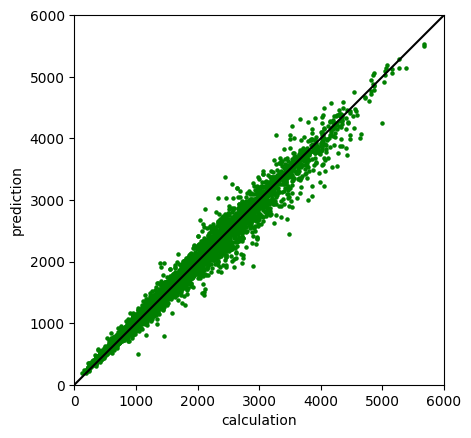

Dataset :  AI2+Human
Epoch 1, Validation Loss: 0.37743440679616425
Epoch 2, Validation Loss: 0.25374317186829765
Epoch 3, Validation Loss: 0.20406588042921867
Epoch 4, Validation Loss: 0.10475015686615118
Epoch 5, Validation Loss: 0.12031764501029876
Epoch 6, Validation Loss: 0.08979329799706087
Epoch 7, Validation Loss: 0.06840876353041539
Epoch 8, Validation Loss: 0.0570544713226997
Epoch 9, Validation Loss: 0.0525534850190688
Epoch 10, Validation Loss: 0.05129419631689667
Epoch 11, Validation Loss: 0.04499439502469255
Epoch 12, Validation Loss: 0.043423645806221045
Epoch 13, Validation Loss: 0.04312126076483909
Epoch 14, Validation Loss: 0.03881105445885853
Epoch 15, Validation Loss: 0.03515820763360469
Epoch 16, Validation Loss: 0.034313737147807846
Epoch 17, Validation Loss: 0.032070448556088954
Epoch 18, Validation Loss: 0.03848891982182477
Epoch 19, Validation Loss: 0.03362249471979178
Epoch 20, Validation Loss: 0.03175433930123455
Epoch 21, Validation Loss: 0.03305793068978594


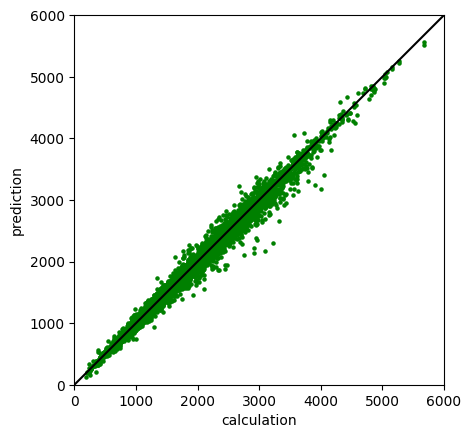

Dataset :  Random+Human
Epoch 1, Validation Loss: 0.29171290458763904
Epoch 2, Validation Loss: 0.1969922133484246
Epoch 3, Validation Loss: 0.13571030389385116
Epoch 4, Validation Loss: 0.12030751184921874
Epoch 5, Validation Loss: 0.08798744005058938
Epoch 6, Validation Loss: 0.07658707921176774
Epoch 7, Validation Loss: 0.06447392788959223
Epoch 8, Validation Loss: 0.058025068997723604
Epoch 9, Validation Loss: 0.053019242162472564
Epoch 10, Validation Loss: 0.05129482604839239
Epoch 11, Validation Loss: 0.05137496622317151
Epoch 12, Validation Loss: 0.04362260185165119
Epoch 13, Validation Loss: 0.04006204651166045
Epoch 14, Validation Loss: 0.0391768798739965
Epoch 15, Validation Loss: 0.03741713648773784
Epoch 16, Validation Loss: 0.036889612266439324
Epoch 17, Validation Loss: 0.034607793394724765
Epoch 18, Validation Loss: 0.034910185340587846
Epoch 19, Validation Loss: 0.03372728601215252
Epoch 20, Validation Loss: 0.033775070940778765
Epoch 21, Validation Loss: 0.033297851822

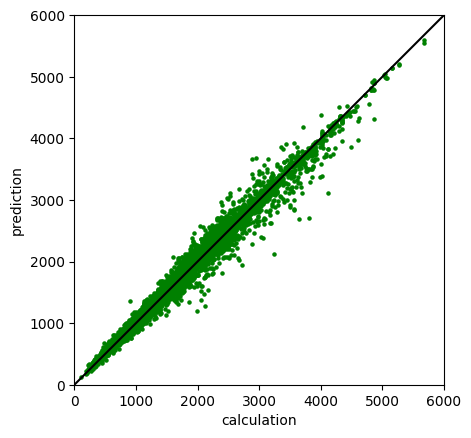

Dataset :  AI+Random
Epoch 1, Validation Loss: 0.33936653956688567
Epoch 2, Validation Loss: 0.12390930564707588
Epoch 3, Validation Loss: 0.15452932219661106
Epoch 4, Validation Loss: 0.07890385721252806
Epoch 5, Validation Loss: 0.06943869233335301
Epoch 6, Validation Loss: 0.06334062926814192
Epoch 7, Validation Loss: 0.05914961680007123
Epoch 8, Validation Loss: 0.05670484524954294
Epoch 9, Validation Loss: 0.05387589279399326
Epoch 10, Validation Loss: 0.05401901766730777
Epoch 11, Validation Loss: 0.04872487411944637
Epoch 12, Validation Loss: 0.046272375099513104
Epoch 13, Validation Loss: 0.04352368082784898
Epoch 14, Validation Loss: 0.04267940909306071
Epoch 15, Validation Loss: 0.04147957142666575
Epoch 16, Validation Loss: 0.04053168377265691
Epoch 17, Validation Loss: 0.05243479705529256
Epoch 18, Validation Loss: 0.04841137938888608
Epoch 19, Validation Loss: 0.04257120169842248
Epoch 20, Validation Loss: 0.04511053071677328
Epoch 21, Validation Loss: 0.042855885879436124

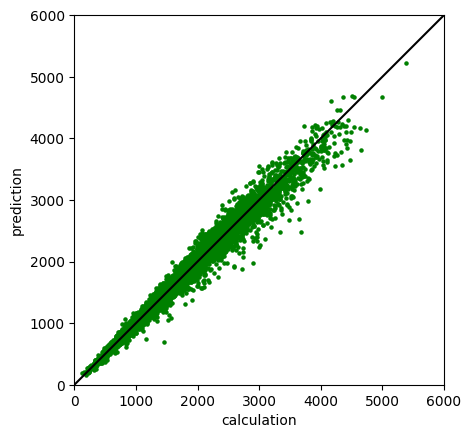

Dataset :  AI2+Random
Epoch 1, Validation Loss: 0.291565123044468
Epoch 2, Validation Loss: 0.13774721423302855
Epoch 3, Validation Loss: 0.10314895805282671
Epoch 4, Validation Loss: 0.09784922300088898
Epoch 5, Validation Loss: 0.08289422869275861
Epoch 6, Validation Loss: 0.07596302081451242
Epoch 7, Validation Loss: 0.07029531106583778
Epoch 8, Validation Loss: 0.06434722956519665
Epoch 9, Validation Loss: 0.06166329973772189
Epoch 10, Validation Loss: 0.05467539256175094
Epoch 11, Validation Loss: 0.05154117024439197
Epoch 12, Validation Loss: 0.04986888957297632
Epoch 13, Validation Loss: 0.04782668794538451
Epoch 14, Validation Loss: 0.04714621525008401
Epoch 15, Validation Loss: 0.04466398854553012
Epoch 16, Validation Loss: 0.04186276886535655
Epoch 17, Validation Loss: 0.040343537149891764
Epoch 18, Validation Loss: 0.040291459703329174
Epoch 19, Validation Loss: 0.04141278198199941
Epoch 20, Validation Loss: 0.03911185547206424
Epoch 21, Validation Loss: 0.037376349509501604

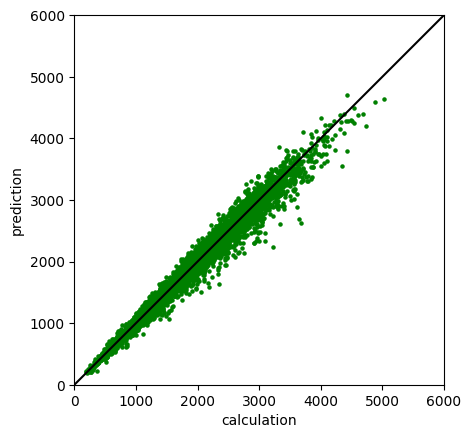

Dataset :  AI+AI2
Epoch 1, Validation Loss: 0.2553632274682666
Epoch 2, Validation Loss: 0.13704322764601898
Epoch 3, Validation Loss: 0.12369233022446263
Epoch 4, Validation Loss: 0.09248690910813623
Epoch 5, Validation Loss: 0.0813855207364161
Epoch 6, Validation Loss: 0.07617122131272742
Epoch 7, Validation Loss: 0.0612375002499373
Epoch 8, Validation Loss: 0.06471966050712512
Epoch 9, Validation Loss: 0.05514094385050257
Epoch 10, Validation Loss: 0.054780027253769376
Epoch 11, Validation Loss: 0.05638764646363417
Epoch 12, Validation Loss: 0.049632907226823286
Epoch 13, Validation Loss: 0.04509123153308077
Epoch 14, Validation Loss: 0.043662553759211326
Epoch 15, Validation Loss: 0.04294173957671942
Epoch 16, Validation Loss: 0.04254781189692148
Epoch 17, Validation Loss: 0.04054157388017539
Epoch 18, Validation Loss: 0.03910089396627615
Epoch 19, Validation Loss: 0.03746159973342906
Epoch 20, Validation Loss: 0.037576864374339596
Epoch 21, Validation Loss: 0.03627445666698595
Epo

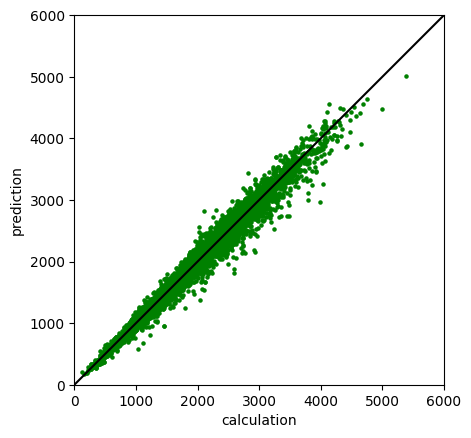

In [4]:
torch.manual_seed(0)

target_data = "bertzct"
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
    
for d in ["AI+Human", "AI2+Human", "Random+Human", "AI+Random", "AI2+Random", "AI+AI2"]:
    torch.manual_seed(0)
    print('Dataset : ', d)
    dataset = d

    with open(f'data_{dataset}/data_train_list.pkl', 'rb') as f:
        data_train_list = pickle.load(f)
    with open(f'data_{dataset}/data_val_list.pkl', 'rb') as f:
        data_val_list = pickle.load(f)
    with open(f'data_{dataset}/data_test_list.pkl', 'rb') as f:
        data_test_list = pickle.load(f)
    with open(f'data_{dataset}/target_train_{target_data}.pkl', 'rb') as f:
        target_train = pickle.load(f)
    with open(f'data_{dataset}/target_val_{target_data}.pkl', 'rb') as f:
        target_val = pickle.load(f)
    with open(f'data_{dataset}/target_test_{target_data}.pkl', 'rb') as f:
        target_test = pickle.load(f)
    
    scaler = StandardScaler()
    target_train = scaler.fit_transform(np.array(target_train).reshape(-1, 1)).flatten()
    target_val = scaler.transform(np.array(target_val).reshape(-1, 1)).flatten()
    target_test = scaler.transform(np.array(target_test).reshape(-1, 1)).flatten()
    target_train = torch.tensor(target_train, dtype=torch.float32)
    target_val = torch.tensor(target_val, dtype=torch.float32)
    target_test = torch.tensor(target_test, dtype=torch.float32)

    train_loader = DataLoader(list(zip(data_train_list, target_train)), batch_size=128, collate_fn=custom_collate)
    val_loader = DataLoader(list(zip(data_val_list, target_val)), batch_size=128, collate_fn=custom_collate)
    test_loader = DataLoader(list(zip(data_test_list, target_test)), batch_size=128, collate_fn=custom_collate)

    model = Net().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    early_stopping_patience = 30
    best_val_loss = float('inf')
    patience_counter = 0

    loss_train = []
    for epoch in range(100):
        model.train()
        for data, target in train_loader:
            data = data.to(device)
            target = target.to(device)
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, target.view(-1, 1))
            loss.backward()
            optimizer.step()
            loss_train.append(loss.item())
        
        model.eval()
        val_loss = 0
        total_size = 0
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device)
                target = target.to(device)
                out = model(data)
                loss = criterion(out, target.view(-1, 1))
                val_loss += loss.item() * data.size(0)
                total_size += data.size(0)
        val_loss /= total_size
        
        print(f'Epoch {epoch+1}, Validation Loss: {val_loss}')
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), f'data_{dataset}/model_{dataset}_sc.pth')
        else:
            patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    model.load_state_dict(torch.load(f'data_{dataset}/model_{dataset}_sc.pth'))
    model.eval()
    
    pred_train = []
    for data, target in train_loader:
        data = data.to(device)
        with torch.no_grad():
            out = model(data)
        pred_train.append(out.cpu().numpy())
    pred_train = np.concatenate(pred_train)

    pred_test = []
    for data, target in test_loader:
        data = data.to(device)
        with torch.no_grad():
            out = model(data)
        pred_test.append(out.cpu().numpy())
    pred_test = np.concatenate(pred_test)

    pred_train = scaler.inverse_transform(pred_train)
    pred_test = scaler.inverse_transform(pred_test)
    target_train = scaler.inverse_transform(np.array(target_train).reshape(-1, 1)).flatten()
    target_test = scaler.inverse_transform(np.array(target_test).reshape(-1, 1)).flatten()

    print('R2 train:', metrics.r2_score(target_train, pred_train))
    print('R2 test:', metrics.r2_score(target_test, pred_test))
    
    n = 6000
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(range(0, n+1), range(0, n+1), c='black')
    plt.scatter(target_test, pred_test, c='green', s=5)
    plt.xlim(0, n)
    plt.ylim(0, n)
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel("calculation")
    plt.ylabel("prediction")
    plt.show()
    fig.savefig(f'data_{dataset}/source_sc.pdf')
    print('======================================================')